In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [3]:
# Importing dataset
FinalR = pd.read_csv("FinalR.csv")

In [4]:
FinalR.head()

,Severity,City,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,Bump,...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,year,Date,Month,Start Time,End Time
0,3,Westfield,NY,26.1,66,30.19,10.0,3.5,0,0,...,0,1,1,1,1,2019,19/03/03,3,9:53:41,10:22:21
1,3,Hamburg,NY,28.0,61,30.03,10.0,5.8,0,0,...,0,1,1,1,1,2019,19/03/03,3,15:25:49,15:55:22
2,3,Grand Island,NY,25.0,75,30.04,2.5,8.1,0,0,...,0,1,1,1,1,2019,19/03/03,3,17:36:46,18:06:29
3,3,Niagara Falls,NY,25.0,75,30.04,2.5,8.1,0,0,...,0,1,1,1,1,2019,19/03/03,3,17:48:42,18:18:20
4,2,Bradford,PA,24.1,88,29.95,0.5,5.8,0,0,...,0,1,1,1,1,2019,19/03/03,3,17:54:31,18:24:07


In [5]:
FinalR.shape

(223223, 30)

In [32]:
datafinal = FinalR.drop(["City","State","Date","Start Time","End Time","Amenity","Bump","Crossing",
                        "Give_Way","Junction","No_Exit","Railway","Roundabout","Station","Stop",
                        "Traffic_Calming","Traffic_Signal","Turning_Loop","Sunrise_Sunset","Civil_Twilight",
                        "Nautical_Twilight","year","Month","Severity","Astronomical_Twilight"],axis = 1)

In [33]:
datafinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223223 entries, 0 to 223222
Data columns (total 5 columns):
Temperature(F)     223223 non-null float64
Humidity(%)        223223 non-null int64
Pressure(in)       223223 non-null float64
Visibility(mi)     223223 non-null float64
Wind_Speed(mph)    223223 non-null float64
dtypes: float64(4), int64(1)
memory usage: 8.5 MB


In [34]:
k_rg = range(1,11)
sum_of_Square = []

for k in k_rg:
    km = KMeans(n_clusters=k,random_state=125)
    km.fit(datafinal)
    sum_of_Square.append(km.inertia_)

In [35]:
sum_of_Square

[179007147.62610686,
 98146654.78834128,
 70064431.24880737,
 56550374.63328724,
 46516317.542492665,
 39564343.673193626,
 33548192.69707229,
 30817197.092651088,
 28504944.264606394,
 26491777.680465084]

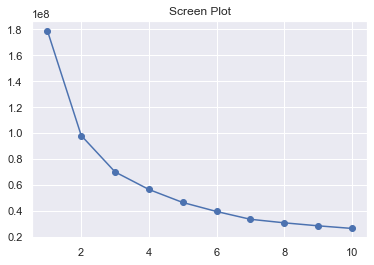

In [36]:
plt.xlabel=('No of Clusters')
plt.ylabel = ('sum of Squareed error')
plt.title('Screen Plot')
plt.plot(k_rg,sum_of_Square,marker="o")

In [135]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [136]:
ypredict = km.fit_predict(datafinal.iloc[:,:])
ypredict

array([1, 1, 1, ..., 0, 0, 0])

In [137]:
datafinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223223 entries, 0 to 223222
Data columns (total 6 columns):
Temperature(F)     223223 non-null int32
Humidity(%)        223223 non-null int32
Pressure(in)       223223 non-null int32
Visibility(mi)     223223 non-null int32
Wind_Speed(mph)    223223 non-null int32
cluster            223223 non-null int32
dtypes: int32(6)
memory usage: 5.1 MB


In [138]:
datafinal["Temperature(F)"] = datafinal["Temperature(F)"].astype(int)
datafinal["Pressure(in)"] = datafinal["Pressure(in)"].astype(int)
datafinal["Visibility(mi)"] = datafinal["Visibility(mi)"].astype(int)
datafinal["Wind_Speed(mph)"] = datafinal["Wind_Speed(mph)"].astype(int)
datafinal["Humidity(%)"] = datafinal["Humidity(%)"].astype(int)

In [141]:
datafinal['cluster']=ypredict
datafinal.head(5)

,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),cluster
0,26,66,30,10,3,1
1,28,61,30,10,5,1
2,25,75,30,2,8,1
3,25,75,30,2,8,1
4,24,88,29,0,5,1


In [140]:
km.cluster_centers_

array([[4.90242084e+01, 8.54367409e+01, 2.96237394e+01, 7.54634171e+00,
        7.99888849e+00, 1.00033651e+00],
       [2.26684315e+01, 7.23042083e+01, 2.97639657e+01, 8.25866227e+00,
        9.16022700e+00, 1.99905717e+00],
       [5.40567817e+01, 4.31292193e+01, 2.97609028e+01, 1.01456182e+01,
        9.05433898e+00, 5.58442181e-13]])

In [85]:
km.labels_

array([2, 2, 2, ..., 1, 1, 1])

In [86]:
silhouette_score(datafinal, km.labels_)

0.357347994523546

# Displays 1st, 2nd and 3rd centroid of the scatter plot

In [87]:
# Distributing the cluster value into DB1, DB2,DB3.  This will help in plotting scatter plotter to identify the proper group
k_df1 = datafinal[datafinal.cluster==0]
k_df2 = datafinal[datafinal.cluster==1]
k_df3 = datafinal[datafinal.cluster==2]
k_df4 = datafinal[datafinal.cluster==3]


In [117]:
k_df1.head()

,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),cluster
9,39,53,30,10,4,0
10,39,53,30,10,4,0
11,39,45,30,10,5,0
24,41,38,30,10,3,0
25,37,42,30,10,8,0


No handles with labels found to put in legend.


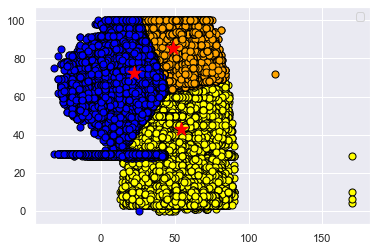

In [134]:
plt.xlabel=('Temperature')
plt.ylabel=('Features')

plt.scatter(k_df1['Temperature(F)'],k_df1['Humidity(%)'],color='yellow',edgecolors='black', s=50)
plt.scatter(k_df1['Temperature(F)'],k_df1['Pressure(in)'],color='yellow',edgecolors='black', s=50)
plt.scatter(k_df1['Temperature(F)'],k_df1['Visibility(mi)'],color='yellow',edgecolors='black', s=50)
plt.scatter(k_df1['Temperature(F)'],k_df1['Wind_Speed(mph)'],color='yellow',edgecolors='black', s=50)

plt.scatter(k_df2['Temperature(F)'],k_df2['Humidity(%)'],color='orange',edgecolors='black', s=50)
#plt.scatter(k_df2['Temperature(F)'],k_df2['Pressure(in)'],color='green',edgecolors='black', s=50)
#plt.scatter(k_df2['Temperature(F)'],k_df2['Visibility(mi)'],color='green',edgecolors='black', s=50)

plt.scatter(k_df3['Temperature(F)'],k_df3['Humidity(%)'],color='blue',edgecolors='black', s=50)
plt.scatter(k_df3['Temperature(F)'],k_df3['Pressure(in)'],color='blue',edgecolors='black', s=50)
#plt.scatter(k_df3['Temperature(F)'],k_df3['Visibility(mi)'],color='blue',edgecolors='black', s=50)

plt.scatter(k_df4['Temperature(F)'],k_df4['Humidity(%)'],color='red',edgecolors='black', s=50)
plt.scatter(k_df4['Temperature(F)'],k_df4['Pressure(in)'],color='red',edgecolors='black', s=50)
plt.scatter(k_df4['Temperature(F)'],k_df4['Visibility(mi)'],color='red',edgecolors='black', s=50)

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="red",s=200,marker="*")
plt.legend()
